**Before you dive into the implementations, I highly recommend first learning the heart of each concept —its core idea and where we use. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**


#NLP Basics: A Comprehensive Guide in Python

This repository contains implementations of fundamental NLP concepts using Python. Each section provides an explanation of the concept along with a runnable code snippet—perfect for learning, experimenting, and building a basic  foundation in Natural Language Processing.




#1. Tokenization

**Explanation:**

Tokenization is the process of splitting text into smaller units called tokens (which could be words, sentences, or characters). This is often the first step in text processing.

**Example (using NLTK):**

In [3]:
import nltk
nltk.download('punkt_tab')  # download required tokenizer models

text = "Hello, world! Welcome to NLP."
tokens = nltk.word_tokenize(text)
print("Tokens:", tokens )

Tokens: ['Hello', ',', 'world', '!', 'Welcome', 'to', 'NLP', '.']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#2. Case Folding

**Explanation:**
Case folding converts text into a uniform case (usually lowercase) to reduce variations and standardize the input for further processing.

**Example:**

In [4]:
text = "Hello, World! This is NLP."
text_lower=text.lower()
print("Lowercase Text:", text_lower)


Lowercase Text: hello, world! this is nlp.


#3. Stop Words Removal

**Explanation:**
Stop words are common words (like "the", "is", "and") that often carry little useful meaning. Removing them can help focus on the important words.

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

text = "This is an example showing removal of stop words from the text."
tokens = nltk.word_tokenize(text)

filtered_tokens=[word for word in tokens if word.lower() not in stopwords.words('english')]
print("Words after removing stop words:", filtered_tokens)

Words after removing stop words: ['example', 'showing', 'removal', 'stop', 'words', 'text', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#4. Stemming

**Explanation:**
Stemming reduces words to their base or root form by chopping off word endings using simple heuristic rules (which may sometimes lead to non-dictionary stems).

In [10]:
from nltk.stem import PorterStemmer

stemmer = nltk.PorterStemmer()
words = ["running", "runner", "ran", "runs"]

stemmed_words=[stemmer.stem(word) for word in words]
print('Stemmed Words:', stemmed_words)


Stemmed Words: ['run', 'runner', 'ran', 'run']


#5. Lemmatization

Explanation:
Lemmatization also reduces words to their base form (lemma) but uses a dictionary and considers the context, ensuring the result is an actual word.

**Example (using NLTK’s WordNetLemmatizer):**

In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
word = "running"
lemma = lemmatizer.lemmatize(word, pos='v')  # 'v' specifies the word is used as a verb
print("Lemma of 'running':", lemma)
print('running:', lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Lemma of 'running': run
running: run


#6. Part-of-Speech (POS) Tagging

**Explanation:**
POS tagging assigns each token a part-of-speech tag (e.g., noun, verb, adjective) that indicates its grammatical role.

In [16]:
text = "The quick brown fox jumps over the lazy dog."
nltk.download('averaged_perceptron_tagger')
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)
print("POS Tags:", pos_tags)


POS Tags: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Here's a brief explanation of the

POS tags:

*  DT: Determiner
* JJ: Adjective
* NN: Noun, singular or mass
*VBZ: Verb, 3rd person singular present
*IN: Preposition or subordinating conjunction
*.: Punctuation mark

For more detailed information on POS tags and their meanings, you can refer to the NLTK documentation.

#7. Named Entity Recognition (NER)

**Explanation:**
NER identifies and classifies named entities in text such as names of people, organizations, locations, etc.

**Example (using spaCy):**

In [ ]:
!python -m spacy download en_core_web_sm  # download spaCy model

In [19]:
import spacy
nlp = spacy.load('en_core_web_sm')

text = "Apple is looking to buy a startup in the U.K. for $1 billion."

doc = nlp(text)

print("Named Entities:")
for ent in doc.ents:
  print(ent.text, ent.label_)


Named Entities:
Apple ORG
U.K. GPE
$1 billion MONEY


#8. Parsing

**Explanation:**
Parsing involves analyzing the syntactic structure of a sentence. Dependency parsing, for example, shows how words in a sentence are related to each other.

In [20]:
doc = nlp("The quick brown fox jumps over the lazy dog.")
print("Dependency Parse:")
for token in doc:
    print(f"{token.text:10s} --> {token.dep_:10s} --> {token.head.text}")


Dependency Parse:
The        --> det        --> fox
quick      --> amod       --> fox
brown      --> amod       --> fox
fox        --> nsubj      --> jumps
jumps      --> ROOT       --> jumps
over       --> prep       --> jumps
the        --> det        --> dog
lazy       --> amod       --> dog
dog        --> pobj       --> over
.          --> punct      --> jumps


jumps ──► fox (nsubj)

  │

  ├──► The (det)

  ├──► quick (amod)

  ├──► brown (amod)

  ├──► over (prep)

  │     └──► dog (pobj)

  │           |──► the (det)

  │         └──► lazy (amod)

  └──► . (punct)

Here's a breakdown of the dependencies:

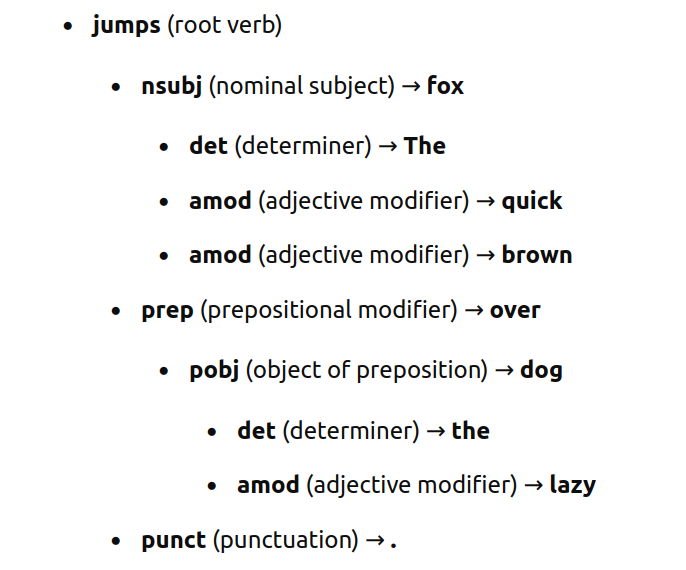

In this structure, "jumps" is the central action (root) of the sentence. The subject "fox" is described by the adjectives "quick" and "brown," and is determined by "The." The action "jumps" is further connected to the prepositional phrase "over the lazy dog," where "over" is the preposition linking to "dog," which is described by "the" and "lazy."

#9. Bag-of-Words (BoW)

**Explanation:**
BoW is a method for representing text as a collection of word frequencies, disregarding grammar and word order but preserving count.

**Example (using scikit-learn):**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

texts = [
    "I love natural language processing.",
    "Language processing is fascinating.",
    "I love coding in Python."
]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(texts)
print('Vocabulary:', vectorizer.get_feature_names_out())
print("Bag-of-words array:\n", bow.toarray())

Vocabulary: ['coding' 'fascinating' 'in' 'is' 'language' 'love' 'natural' 'processing'
 'python']
Bag-of-words array:
 [[0 0 0 0 1 1 1 1 0]
 [0 1 0 1 1 0 0 1 0]
 [1 0 1 0 0 1 0 0 1]]


#10. N-grams

**Explanation:**

N-grams are contiguous sequences of n tokens from text. They help capture context and can be used for various NLP tasks.

**Example (creating bigrams and trigrams using NLTK):**

In [22]:
from nltk import ngrams

text = "I love natural language processing"
tokens = nltk.word_tokenize(text)

bigrams= list(ngrams(tokens , 2))
trigrams= list(ngrams(tokens , 3))

print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

Bigrams: [('I', 'love'), ('love', 'natural'), ('natural', 'language'), ('language', 'processing')]
Trigrams: [('I', 'love', 'natural'), ('love', 'natural', 'language'), ('natural', 'language', 'processing')]


#11. TF-IDF (Term Frequency-Inverse Document Frequency)

**Explanation:**

TF-IDF is a weighting method that reflects how important a word is to a document relative to a corpus. It helps down-weight common words while highlighting rare ones.

**Example (using scikit-learn’s TfidfVectorizer):**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "I love reading about natural language processing.",
    "Language processing is a fascinating field.",
    "Studying natural language processing can be very rewarding."
]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print("TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Feature Names: ['about' 'be' 'can' 'fascinating' 'field' 'is' 'language' 'love' 'natural'
 'processing' 'reading' 'rewarding' 'studying' 'very']
TF-IDF Matrix:
 [[0.48359121 0.         0.         0.         0.         0.
  0.28561676 0.48359121 0.36778358 0.28561676 0.48359121 0.
  0.         0.        ]
 [0.         0.         0.         0.52004008 0.52004008 0.52004008
  0.30714405 0.         0.         0.30714405 0.         0.
  0.         0.        ]
 [0.         0.39916886 0.39916886 0.         0.         0.
  0.23575556 0.         0.30357821 0.23575556 0.         0.39916886
  0.39916886 0.39916886]]


#12. Similarity Score

**Explanation:**

Similarity scoring measures how similar two pieces of text are. Cosine similarity is a common method that compares the orientation (but not magnitude) of two vectors.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample documents
documents = [
    "I enjoy reading about NLP.",
    "NLP is a fascinating field.",
    "I love studying natural language processing."
]

# Initialize the TF-IDF Vectorizer without removing stop words
tfidf_vectorizer = TfidfVectorizer(stop_words=None)

# Fit and transform the documents into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Calculate cosine similarity between Document 1 and Document 2
sim_score_doc1_doc2 = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

# Calculate cosine similarity between Document 1 and Document 3
sim_score_doc1_doc3 = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[2:3])

# Print the cosine similarity scores
print("Cosine Similarity between Document 1 and Document 2:", sim_score_doc1_doc2[0][0])
print("Cosine Similarity between Document 1 and Document 3:", sim_score_doc1_doc3[0][0])


Cosine Similarity between Document 1 and Document 2: 0.16163635792525347
Cosine Similarity between Document 1 and Document 3: 0.0


#hardcoded

In [41]:
import math
a=[1,2,3]
b=[2,3,4]

dot_product = sum(i*j for i,j in zip(a,b))

magnitute_a= math.sqrt(sum(i**2 for i in a))
magnitute_b= math.sqrt(sum(j**2 for j in b))


similar_score = dot_product/(magnitude_a*magnitude_b)
print(similar_score)

0.9925833339709303
